In [1]:
%matplotlib inline  

import os
import librosa
import librosa.display
import numpy as np
from laughter_classification.sspnet_data_sampler import SSPNetDataSampler
from laughter_prediction.feature_extractors import LibrosaExtractor

In [2]:
!mkdir -p data

In [3]:
directory = 'vocalizationcorpus/data'
audio_files = list(sorted(os.listdir('vocalizationcorpus/data')))

audio_file = directory + '/' + audio_files[0]
audio_file

'vocalizationcorpus/data/S0001.wav'

(128, 1)


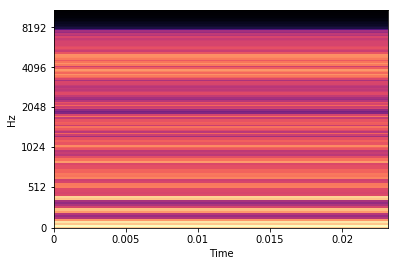

In [4]:
y, sr = librosa.load(audio_file)
S = librosa.feature.melspectrogram(y[:int(sr * 0.01)], sr)
S = librosa.power_to_db(S)

print(S.shape)
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='mel')

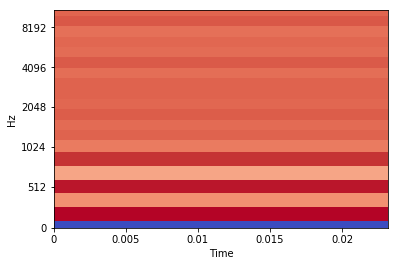

In [5]:
y, sr = librosa.load(audio_file)
S = librosa.feature.mfcc(y[:int(sr * 0.01)], sr)
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='mel')

In [6]:
extractor = LibrosaExtractor()
extractor.extract_features(audio_file).head()

,fbank_000,fbank_001,fbank_002,fbank_003,fbank_004,fbank_005,fbank_006,fbank_007,fbank_008,fbank_009,...,mfcc_010,mfcc_011,mfcc_012,mfcc_013,mfcc_014,mfcc_015,mfcc_016,mfcc_017,mfcc_018,mfcc_019
0,-14.770546,-7.502573,-14.677981,-10.937127,-21.269282,-39.300535,-43.299913,-38.613908,-20.862417,-16.210959,...,7.274429,11.029847,10.672556,-0.565825,19.375721,1.419888,6.978270,-2.037510,20.511622,8.859711
1,-16.770523,-8.677541,-18.883031,-33.635306,-29.146382,-23.314792,-15.536017,-10.014064,-25.719489,-35.669000,...,-16.901669,-7.184055,-19.194132,-17.970590,12.663122,-0.107084,20.268938,1.372494,-7.076095,8.931564
2,-12.352719,-4.444362,-14.673733,-42.556730,-17.731121,-11.759801,-19.046962,-15.194353,-23.255466,-19.323618,...,-11.666725,2.564224,-4.208590,-11.211039,16.965807,16.649665,23.453795,11.212921,9.460361,-13.224893
3,-15.440580,-7.917505,-18.145880,-45.599949,-29.652522,-23.691098,-19.468875,-14.010716,-25.302332,-22.604453,...,-0.191644,9.514174,-7.796018,-7.132752,11.623116,8.058064,21.677039,-1.138147,-2.169490,-5.259990
4,-18.958624,-11.360067,-18.807546,-15.593530,-23.763246,-21.985535,-24.705120,-19.680730,-22.500579,-18.102045,...,-14.405206,-4.518877,4.056877,6.588490,14.185785,-15.692512,3.539914,12.142542,9.761851,3.887359


In [7]:
SAMPLE_RATE = 16000
FRAME_SEC = 0.3

In [8]:
sampler = SSPNetDataSampler('vocalizationcorpus')

In [9]:
data = sampler.create_sampled_df(FRAME_SEC, save_path='data/sampled.csv')

iter 4/2735 6.239756345748901
iter 8/2735 11.682041645050049
iter 16/2735 21.865824937820435
iter 32/2735 40.323034048080444
iter 64/2735 79.43757104873657
iter 128/2735 155.90777373313904
iter 256/2735 311.2718641757965
iter 512/2735 617.9225254058838
iter 1024/2735 1236.7022745609283
iter 2048/2735 2441.7470264434814
saving df:  data/sampled.csv


In [10]:
data

,fbank_000,fbank_001,fbank_002,fbank_003,fbank_004,fbank_005,fbank_006,fbank_007,fbank_008,fbank_009,...,mfcc_012,mfcc_013,mfcc_014,mfcc_015,mfcc_016,mfcc_017,mfcc_018,mfcc_019,IS_LAUGHTER,SNAME
0,-1.822273,-4.153107,-6.127165,-4.744270,-3.042214,-1.339390,3.440107,12.049357,18.508058,18.495235,...,-3.279198,-7.744685,13.188406,-15.828284,-2.788314,-6.735201,-0.648314,-2.205029,0,S0883
1,-15.560526,-12.192421,-17.653885,-19.870362,-14.625828,-18.043698,-17.459772,-15.043800,-15.155906,-14.942318,...,2.968277,-3.823424,7.782831,-10.649842,12.054846,-16.101373,7.706882,7.032740,0,S0883
2,-13.402336,-9.324762,-11.337922,-13.557925,-11.274661,-11.788429,-12.618071,-13.004464,-12.791547,-12.865611,...,10.503806,-3.110308,16.844341,-16.793098,9.245858,-12.490855,1.376820,-1.481758,0,S0883
3,-15.991697,-11.128731,-14.647389,-14.145352,-10.337301,-8.605968,-6.843310,-8.546107,-9.693120,-10.963831,...,15.545574,-3.590542,14.474457,-15.913445,2.790456,-15.866880,-1.439778,-4.094808,0,S0883
4,-16.955938,-13.346069,-15.512038,-17.894600,-18.070054,-17.828938,-16.749832,-16.722315,-19.911563,-19.673532,...,5.920388,-4.687736,15.792177,-13.221612,13.721047,-13.489680,9.807748,-2.527528,0,S0883
5,0.646691,-5.498471,-6.820034,-8.193006,-7.084161,-3.792549,-1.219193,11.592491,17.865859,15.925368,...,-2.049894,-14.379304,3.403395,-12.829240,2.768446,-5.736103,3.966473,0.461561,0,S0883
6,-6.284641,-4.476452,-4.508171,-5.953777,-6.800229,-4.671392,-0.456830,3.798520,3.489447,4.283108,...,7.559780,-1.081865,0.940473,-14.494771,1.262333,-2.956683,-4.423065,3.032808,0,S0883
7,-15.978457,-12.014055,-19.023314,-23.477487,-19.386470,-20.043930,-20.530321,-19.775818,-20.583855,-20.342087,...,12.887851,-2.703269,14.150279,-16.079925,19.098814,-9.557634,4.102285,-1.883761,0,S0883
8,-16.920980,-13.219841,-16.037795,-18.457891,-18.815624,-15.650121,-14.958242,-15.178341,-16.562365,-18.883285,...,1.705320,-2.482357,11.217743,-20.793836,9.347085,-12.347605,10.098329,-2.900409,0,S0883
9,-15.483795,-11.250385,-14.363998,-15.435853,-15.122773,-16.479205,-16.355765,-15.626713,-14.124518,-13.873653,...,9.564394,-11.874891,9.189812,-19.225750,9.891422,-9.940770,13.255929,-2.335170,0,S0883


In [11]:
sampler_noisy = SSPNetDataSampler('vocalizationcorpus')
data_noisy = sampler_noisy.create_sampled_df(FRAME_SEC, save_path='data/sampled_noisy.csv')

iter 4/2735 5.294134616851807
iter 8/2735 9.404681205749512
iter 16/2735 17.674322843551636
iter 32/2735 34.29687714576721
iter 64/2735 67.43246507644653
iter 128/2735 134.04123711585999
iter 256/2735 268.1665692329407
iter 512/2735 535.7393424510956
iter 1024/2735 1140.6470656394958
iter 2048/2735 2404.368730545044
saving df:  data/sampled_noisy.csv


In [12]:
data_noisy

,fbank_000,fbank_001,fbank_002,fbank_003,fbank_004,fbank_005,fbank_006,fbank_007,fbank_008,fbank_009,...,mfcc_012,mfcc_013,mfcc_014,mfcc_015,mfcc_016,mfcc_017,mfcc_018,mfcc_019,IS_LAUGHTER,SNAME
0,-1.822273,-4.153107,-6.127165,-4.744270,-3.042214,-1.339390,3.440107,12.049357,18.508058,18.495235,...,-3.279198,-7.744685,13.188406,-15.828284,-2.788314,-6.735201,-0.648314,-2.205029,0,S0883
1,-15.560526,-12.192421,-17.653885,-19.870362,-14.625828,-18.043698,-17.459772,-15.043800,-15.155906,-14.942318,...,2.968277,-3.823424,7.782831,-10.649842,12.054846,-16.101373,7.706882,7.032740,0,S0883
2,-13.402336,-9.324762,-11.337922,-13.557925,-11.274661,-11.788429,-12.618071,-13.004464,-12.791547,-12.865611,...,10.503806,-3.110308,16.844341,-16.793098,9.245858,-12.490855,1.376820,-1.481758,0,S0883
3,-15.991697,-11.128731,-14.647389,-14.145352,-10.337301,-8.605968,-6.843310,-8.546107,-9.693120,-10.963831,...,15.545574,-3.590542,14.474457,-15.913445,2.790456,-15.866880,-1.439778,-4.094808,0,S0883
4,-16.955938,-13.346069,-15.512038,-17.894600,-18.070054,-17.828938,-16.749832,-16.722315,-19.911563,-19.673532,...,5.920388,-4.687736,15.792177,-13.221612,13.721047,-13.489680,9.807748,-2.527528,0,S0883
5,0.646691,-5.498471,-6.820034,-8.193006,-7.084161,-3.792549,-1.219193,11.592491,17.865859,15.925368,...,-2.049894,-14.379304,3.403395,-12.829240,2.768446,-5.736103,3.966473,0.461561,0,S0883
6,-6.284641,-4.476452,-4.508171,-5.953777,-6.800229,-4.671392,-0.456830,3.798520,3.489447,4.283108,...,7.559780,-1.081865,0.940473,-14.494771,1.262333,-2.956683,-4.423065,3.032808,0,S0883
7,-15.978457,-12.014055,-19.023314,-23.477487,-19.386470,-20.043930,-20.530321,-19.775818,-20.583855,-20.342087,...,12.887851,-2.703269,14.150279,-16.079925,19.098814,-9.557634,4.102285,-1.883761,0,S0883
8,-16.920980,-13.219841,-16.037795,-18.457891,-18.815624,-15.650121,-14.958242,-15.178341,-16.562365,-18.883285,...,1.705320,-2.482357,11.217743,-20.793836,9.347085,-12.347605,10.098329,-2.900409,0,S0883
9,-15.483795,-11.250385,-14.363998,-15.435853,-15.122773,-16.479205,-16.355765,-15.626713,-14.124518,-13.873653,...,9.564394,-11.874891,9.189812,-19.225750,9.891422,-9.940770,13.255929,-2.335170,0,S0883
